# **Data Understanding**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl

### **1. Upload File Dataset**

Pada bagian ini, kita melakukan upload file dataset (*coffee\_shop\_sales.csv*) ke Google Colab. File inilah yang akan digunakan untuk analisis lebih lanjut.

---

### **2. Membaca Data**

Dataset yang sudah di-upload dibaca menggunakan **pandas** (`pd.read_csv`). Hasilnya disimpan dalam sebuah DataFrame `df` agar mudah diolah.

---


In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Coffee Shop Sales.xlsx")

Saving Coffee Shop Sales.xlsx to Coffee Shop Sales.xlsx


### **3. Melihat Sekilas Data**

* **`df.shape`** → menampilkan ukuran data (jumlah baris dan kolom).
* **`df.info()`** → menunjukkan tipe data tiap kolom dan apakah ada missing values.
* **`df.isnull().sum()`** → menghitung jumlah data kosong di setiap kolom.

Tujuannya adalah untuk memahami struktur data dan mengecek kelengkapan informasi.

---

In [4]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values per kolom:")
print(df.isnull().sum())

Shape: (149116, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB
None

Missing values per kolom:
transaction_id      0
transaction

### **4. Statistik Deskriptif**

Menggunakan **`df.describe()`**, kita mendapatkan ringkasan statistik untuk kolom numerik, seperti:

* Nilai minimum dan maksimum.
* Rata-rata (mean).
* Median (50%).
* Standar deviasi.

Hal ini membantu melihat gambaran umum, misalnya rentang harga produk atau kuantitas transaksi.

---

In [13]:
print("\nStatistik deskriptif numerik:")
print(df.describe())
print("\nContoh data:")
print(df.head())


Statistik deskriptif numerik:
       transaction_id               transaction_date  transaction_qty  \
count   149116.000000                         149116    149116.000000   
mean     74737.371872  2023-04-15 11:50:32.173609984         1.438276   
min          1.000000            2023-01-01 00:00:00         1.000000   
25%      37335.750000            2023-03-06 00:00:00         1.000000   
50%      74727.500000            2023-04-24 00:00:00         1.000000   
75%     112094.250000            2023-05-30 00:00:00         2.000000   
max     149456.000000            2023-06-30 00:00:00         8.000000   
std      43153.600016                            NaN         0.542509   

            store_id     product_id     unit_price        revenue  
count  149116.000000  149116.000000  149116.000000  149116.000000  
mean        5.342063      47.918607       3.382219       4.686367  
min         3.000000       1.000000       0.800000       0.800000  
25%         3.000000      33.000000    

### **5. Membuat Kolom Revenue**

Kita menambahkan kolom baru bernama **`revenue`** sebagai hasil perkalian antara `transaction_qty` dan `unit_price`.
Kolom ini penting karena merepresentasikan pendapatan yang dihasilkan dari setiap transaksi.

---

In [18]:
df["revenue"] = df["transaction_qty"] * df["unit_price"]
df[["transaction_qty", "unit_price", "revenue"]].head()

,transaction_qty,unit_price,revenue
0,2,3.0,6.0
1,2,3.1,6.2
2,2,4.5,9.0
3,1,2.0,2.0
4,2,3.1,6.2


### **6. Analisis Data Dasar**

Beberapa informasi dasar diekstrak, seperti:

* **Total revenue** keseluruhan.
* **Rentang tanggal transaksi** (periode data).
* Jumlah **lokasi toko** yang terlibat.
* Jumlah **produk unik** yang dijual.
---

In [16]:
total_rev = df["revenue"].sum()
print(f"\nTotal Revenue: ${total_rev:,.2f}")
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
print("\nRentang tanggal:", df["transaction_date"].min(), "sampai", df["transaction_date"].max())
print("Jumlah lokasi store unik:", df["store_location"].nunique())
print("Jumlah produk unik:", df["product_id"].nunique())


Total Revenue: $698,812.33

Rentang tanggal: 2023-01-01 00:00:00 sampai 2023-06-30 00:00:00
Jumlah lokasi store unik: 3
Jumlah produk unik: 80


### **7. Visualisasi Dasar**

Beberapa grafik dibuat untuk memahami pola data:

1. **Tren Revenue Harian** → grafik garis untuk melihat pola naik/turun penjualan dari hari ke hari.
2. **Revenue per Hari dalam Seminggu** → grafik batang untuk mengetahui hari mana yang paling ramai atau sepi.
3. **Revenue per Kategori Produk** → grafik batang untuk mengetahui kategori (misalnya Coffee, Tea, Bakery) yang paling banyak menyumbang revenue.
4. **Top 10 Produk Penyumbang Revenue** → grafik batang horizontal untuk menampilkan produk-produk dengan kontribusi terbesar terhadap pendapatan.

---

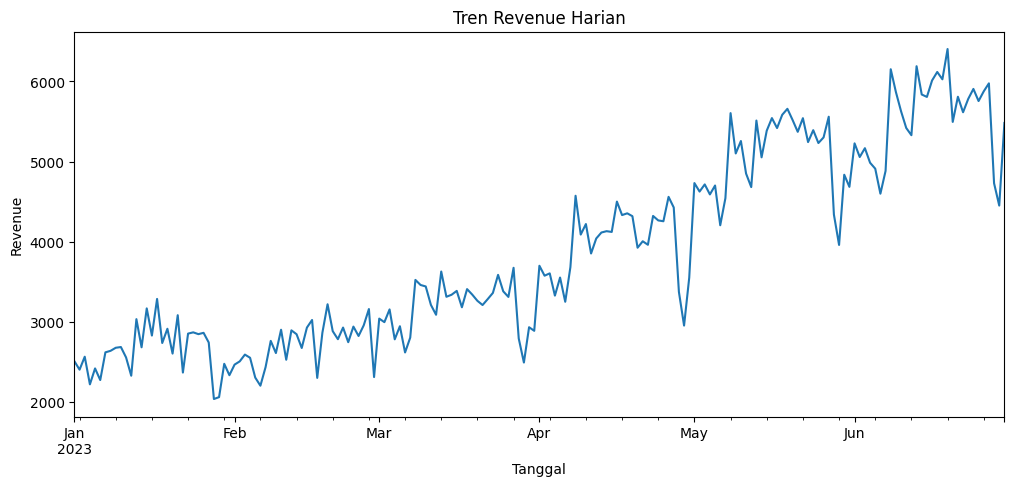

In [7]:
plt.figure(figsize=(12,5))
df.groupby("transaction_date")["revenue"].sum().plot()
plt.title("Tren Revenue Harian")
plt.ylabel("Revenue")
plt.xlabel("Tanggal")
plt.show()

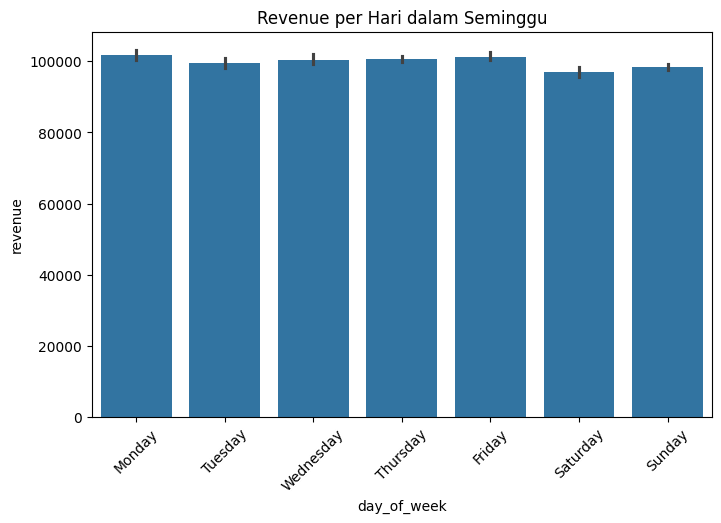

In [8]:
df["day_of_week"] = df["transaction_date"].dt.day_name()
plt.figure(figsize=(8,5))
sns.barplot(x="day_of_week", y="revenue", data=df, estimator=sum, order=[
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
])
plt.title("Revenue per Hari dalam Seminggu")
plt.xticks(rotation=45)
plt.show()

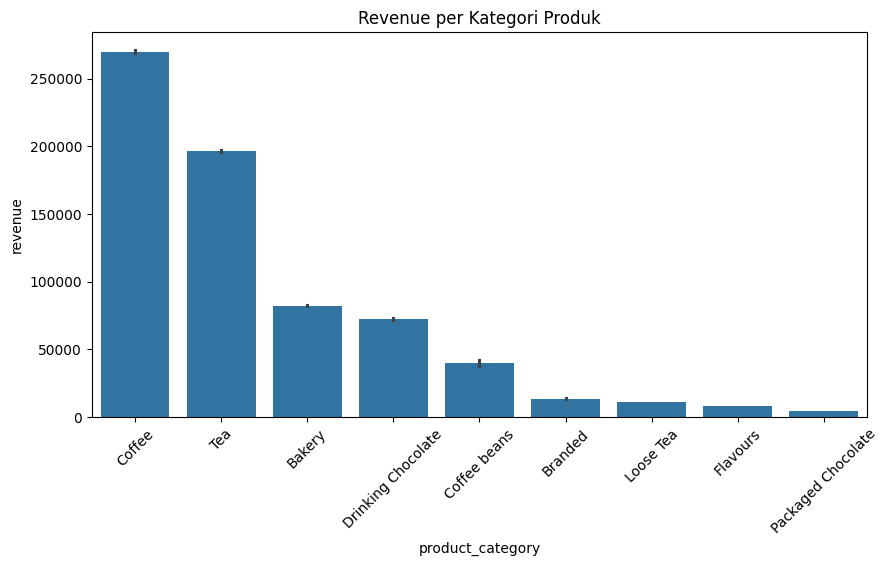

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x="product_category", y="revenue", data=df, estimator=sum, order=df.groupby("product_category")["revenue"].sum().sort_values(ascending=False).index)
plt.title("Revenue per Kategori Produk")
plt.xticks(rotation=45)
plt.show()

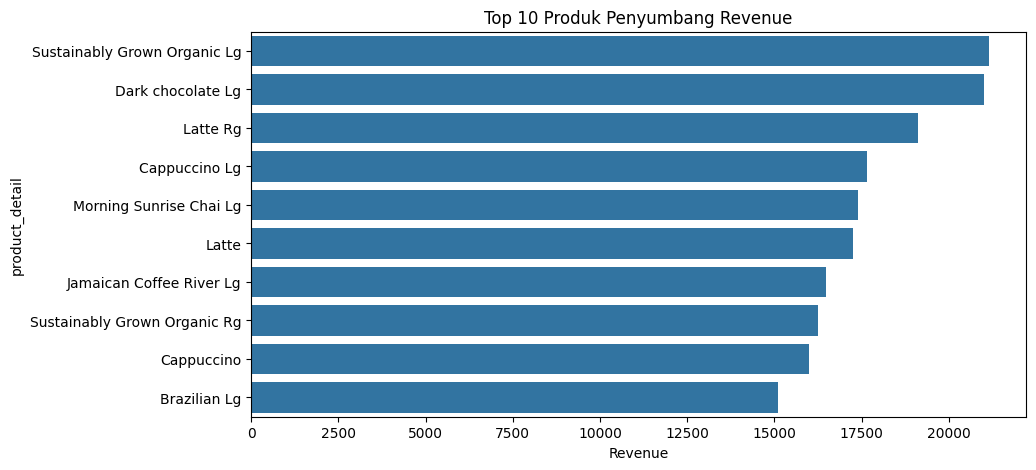

In [10]:
top_products = df.groupby("product_detail")["revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Produk Penyumbang Revenue")
plt.xlabel("Revenue")
plt.show()

### **8. Insight Awal**

Beberapa insight otomatis ditampilkan, seperti:

* Hari dengan **revenue tertinggi**.
* **Kategori produk** dengan revenue terbesar.
* **Lokasi toko** dengan performa penjualan terbaik.

Insight ini menjadi dasar pemahaman bisnis sebelum masuk ke analisis yang lebih dalam.


In [11]:
print("\nInsight Awal:")
print("- Hari dengan revenue tertinggi:", df.groupby("day_of_week")["revenue"].sum().idxmax())
print("- Kategori produk paling tinggi revenue:", df.groupby("product_category")["revenue"].sum().idxmax())
print("- Lokasi dengan revenue terbesar:", df.groupby("store_location")["revenue"].sum().idxmax())


Insight Awal:
- Hari dengan revenue tertinggi: Monday
- Kategori produk paling tinggi revenue: Coffee
- Lokasi dengan revenue terbesar: Hell's Kitchen
